# UNSUPERVISED LEARNING AND PCA

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
#read the data 
data=pd.read_csv('NCI60_X.csv')

In [65]:
data

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
0,V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,...,-0.990020,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
1,V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
2,V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
3,V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
4,V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,V60,-0.030000,-0.480000,0.070000,-0.700000,-0.195000,4.100000e-01,-0.240000,0.105000,-0.410000,...,-0.400019,0.150000,-0.430000,0.145000,-0.090020,-0.020000,-1.390010,-1.150000,0.290000,1.190000
60,V61,-0.270000,0.630000,-0.100000,1.100000,1.045000,8.000000e-02,-0.090000,-0.675000,-0.310000,...,-0.560020,0.200000,0.290000,-0.035000,0.279981,-0.160000,-0.020010,-0.640000,-0.370000,-0.430000
61,V62,0.210000,-0.620000,-0.150000,-1.330000,0.045000,-4.000000e-01,-0.390000,-0.675000,-0.360000,...,-0.160020,-0.120000,0.850000,-0.125000,0.779980,0.390000,0.000000,0.160000,2.030000,3.940000
62,V63,-0.050000,0.140000,-0.090000,-1.260000,0.045000,-2.710505e-20,0.420000,-0.305000,0.310000,...,0.889980,-0.420000,-0.460000,-0.855000,-0.160020,-0.350000,-0.360010,-0.490000,0.010000,-1.720000


In [66]:
data.head()

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
0,V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,...,-0.990020,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
1,V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
2,V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
3,V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
4,V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000


In [67]:
#shape of data
data.shape

(64, 6831)

In [68]:
#statistical description of data
data.describe()

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,...,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,-0.019063,-0.027813,-0.019923,-0.328673,0.026093,0.006718,0.019687,-0.023126,0.000780,0.019237,...,-0.079551,0.402577,0.295077,0.171093,0.101152,0.153671,0.090775,-0.126798,0.129921,0.143514
std,0.441332,0.757433,0.433306,1.091905,0.485073,0.350432,0.370683,0.338629,0.429188,0.641583,...,0.890365,1.131769,1.121419,0.888764,0.641122,0.924292,1.209138,0.787136,0.566303,1.509312
min,-1.060000,-2.190000,-1.710000,-2.610000,-0.825000,-0.700000,-0.920000,-0.705000,-0.900000,-1.654981,...,-1.850020,-0.775000,-1.150000,-2.095000,-1.390020,-1.330000,-2.030010,-1.700000,-0.910000,-2.830000
25%,-0.372500,-0.404985,-0.192485,-1.322500,-0.225000,-0.156250,-0.246250,-0.204985,-0.360000,-0.477466,...,-0.660019,-0.177500,-0.327500,-0.328750,-0.232519,-0.330000,-0.602510,-0.682500,-0.275000,-1.100000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.310005,0.352500,0.162490,0.692500,0.210000,0.184995,0.247505,0.160015,0.295000,0.467519,...,0.304980,0.560000,0.422500,0.427500,0.302480,0.325000,0.134995,0.302505,0.451255,1.250000
max,0.940000,2.240000,1.150000,1.500000,1.715000,1.160000,0.940000,0.724961,0.990000,1.490019,...,2.929980,5.200000,5.510000,3.995000,2.899980,4.600000,5.339990,2.560000,2.030000,3.940000


In [69]:
#information regarding data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Columns: 6831 entries, Unnamed: 0 to 6830
dtypes: float64(6830), object(1)
memory usage: 3.3+ MB


In [70]:
#checking null values
data.isna().sum()

Unnamed: 0    0
1             0
2             0
3             0
4             0
             ..
6826          0
6827          0
6828          0
6829          0
6830          0
Length: 6831, dtype: int64

In [71]:
#label encoding
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
data['Unnamed: 0']=lab_enc.fit_transform(data['Unnamed: 0'])

In [72]:
data.head(5)

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
0,0,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,...,-0.990020,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
1,11,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
2,22,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
3,33,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
4,44,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000


In [73]:
x = data

# KMEANS

In [74]:
from sklearn.cluster import KMeans

In [75]:
kmean_inst = KMeans(n_clusters=5)

In [76]:
kmean_inst.fit(x)

KMeans(n_clusters=5)

In [77]:
kmean_inst.inertia_

196131.91963593097

In [78]:
kmean_inst.cluster_centers_

array([[ 3.07500000e+01, -2.26247562e-01, -2.78747500e-01, ...,
        -3.84997563e-01,  1.41252438e-01,  6.75000000e-02],
       [ 1.30000000e+01,  7.72207778e-02,  1.56850407e-01, ...,
        -1.90001444e-01, -8.85199630e-02, -4.13705148e-01],
       [ 4.18333333e+01, -1.74168289e-01,  2.66666675e-02, ...,
         2.21665042e-01,  7.07498336e-01,  1.40749842e+00],
       [ 5.21250000e+01,  8.56250000e-02, -4.11875000e-01, ...,
         3.05625000e-01,  4.06250000e-02, -5.81250000e-02],
       [ 5.55555556e+01, -1.00021700e-02, -9.00021667e-02, ...,
        -5.56668833e-01,  8.44422778e-02,  3.76664444e-01]])

In [79]:
kmean_inst.labels_

array([1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4])

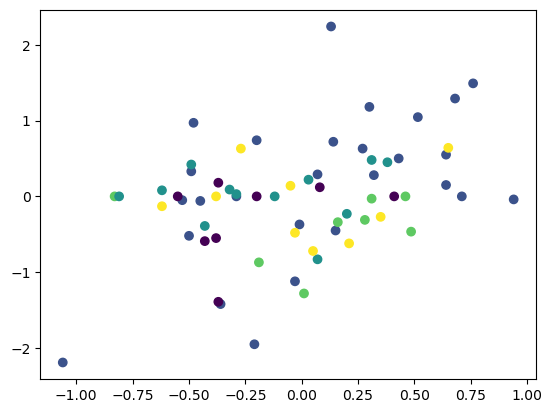

In [80]:
plt.scatter(data['1'], data['2'], c = kmean_inst.labels_)
plt.show()

In [81]:
#sns.pairplot(data)

In [82]:
km_labels = kmean_inst.labels_

In [83]:
#data['km_clus_label'] = km_labels

F:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

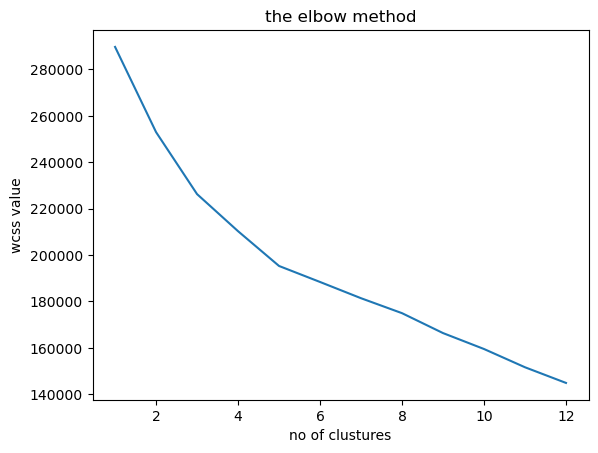

In [84]:
#elbow method
wcss=[]
for i in range(1,13):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,13),wcss)    
plt.title('the elbow method') 
plt.xlabel('no of clustures')
plt.ylabel('wcss value')
plt.show

In [85]:
from sklearn.metrics import silhouette_score

In [86]:
sil_avg=silhouette_score(x,km_labels)

In [87]:
sil_avg

0.14523072050035957

In [88]:
from sklearn.preprocessing import StandardScaler

# Agglomerative clustering models

In [89]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram


In [90]:
mergings = linkage(x , method = "average")

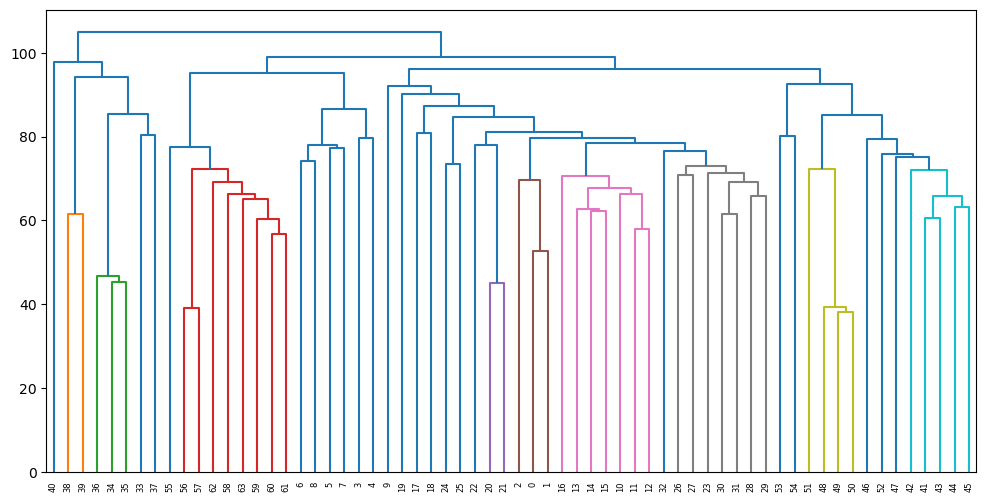

In [91]:
plt.figure(figsize=(12,6))
dendrogram(mergings, labels = data.index)
plt.show()

In [92]:
from sklearn.cluster import AgglomerativeClustering

In [93]:
# fitting data 
hc = AgglomerativeClustering(n_clusters =2, affinity ='euclidean', linkage='average')
y_hc = hc.fit_predict(x)

In [94]:
# finding silhouette score
sil_avg2 = silhouette_score(x, y_hc)


In [95]:
sil_avg2

0.12658071592530343

# PCA

In [96]:
from sklearn.decomposition import PCA

In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
scaler = StandardScaler()

In [99]:
data.loc[:,:] = scaler.fit_transform(data)

In [100]:
data

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
0,-1.705196,0.728671,1.607220,1.325688,1.355688,-0.604845,-0.220654,0.898137,-0.868741,-1.058612,...,-1.030663,-0.358518,-0.238245,-0.392487,0.831370,-0.200286,-0.075668,0.520893,-0.836365,-1.384675
1,-1.109731,1.596418,1.753544,0.441686,0.654119,0.911898,1.648748,1.849697,2.226625,-0.095860,...,-0.215657,-0.625720,-0.489938,-0.800791,0.013818,-1.105413,-1.117676,-0.823652,-0.925425,-1.431446
2,-0.514265,2.190290,-0.016217,-0.349092,0.266465,-1.311310,-0.019322,0.191185,1.988627,1.007979,...,0.452274,-0.251651,-0.930304,-0.868790,-0.583517,-0.331142,-0.075668,0.008704,-0.960951,-0.095838
3,0.081200,0.682995,-0.375502,1.628079,-0.444299,1.244434,-0.019322,0.408709,0.798057,0.045135,...,-1.313667,-0.456479,-0.409013,-0.086293,-0.709285,-0.494711,-1.034286,1.558075,-0.693981,-0.830408
4,0.676665,1.151170,-0.581759,0.965145,1.138767,0.361351,-0.033703,0.177590,0.396239,0.550041,...,0.718297,-1.048700,-0.728079,-0.556925,0.839231,0.492157,-0.075668,1.116312,0.525182,0.000992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1.326263,-0.024977,-0.601719,0.209168,-0.342761,-0.459396,1.159911,-0.706100,0.381357,-0.964676,...,-0.362775,-0.224934,-0.651683,-0.029591,-0.300540,-0.189382,-1.234343,-1.310181,0.284909,0.698834
60,1.380397,-0.573084,0.875343,-0.186266,1.318766,2.117127,0.210772,-0.298243,-1.940254,-0.729836,...,-0.543897,-0.180407,-0.004563,-0.233720,0.281136,-0.342046,-0.092347,-0.657141,-0.889759,-0.382988
61,1.434530,0.523130,-0.788015,-0.302571,-0.924296,0.039286,-1.169792,-1.113957,-1.940254,-0.847256,...,-0.091092,-0.465385,0.498752,-0.335785,1.067185,0.257708,-0.075668,0.367236,3.381761,2.535260
62,1.488663,-0.070652,0.223307,-0.163005,-0.859681,0.039286,-0.019322,1.088471,-0.838977,0.726171,...,1.097522,-0.732552,-0.678646,-1.163643,-0.410587,-0.549234,-0.375762,-0.465070,-0.213435,-1.244439


In [101]:
pc = PCA(25)

In [102]:
pc_arr = pc.fit_transform(data)

In [103]:
pc_arr.shape

(64, 25)

In [104]:
pc_data = pd.DataFrame(pc_arr)

In [105]:
(pc.explained_variance_ratio_ * 100).round(1)

array([11.4,  6.8,  5.8,  4.2,  3.7,  3.6,  3.1,  2.7,  2.5,  2.4,  2.4,
        2.2,  2. ,  2. ,  1.9,  1.8,  1.7,  1.6,  1.6,  1.6,  1.5,  1.5,
        1.4,  1.3,  1.3])

In [106]:
pc_data

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-19.850369,-3.608792,-9.821640,-0.839732,12.595736,7.496089,14.206618,-3.127532,21.961487,-20.329617,...,-5.847175,20.657323,8.506127,9.211226,3.521813,-6.239216,-5.236224,11.977265,8.783955,11.224841
1,-23.098544,-6.480620,-13.478060,5.627145,8.027943,3.741360,10.178723,-7.222592,22.238970,-13.240231,...,5.284616,19.611781,3.829459,10.323439,14.463384,3.388800,-9.185835,4.549956,5.852430,8.429903
2,-27.460052,-2.475630,-3.533518,-1.352946,12.563573,17.341306,10.381557,-2.643483,-0.236595,-6.508649,...,-7.845716,13.466011,-1.350804,-3.411824,4.816979,-2.883956,6.393231,-5.595759,-2.664872,5.918373
3,-42.813266,9.781429,-0.902695,3.425149,42.271135,27.243680,17.535650,-0.479526,14.209603,16.094000,...,-21.320216,-2.755826,1.129639,2.366099,0.015028,6.590049,-18.827690,6.836953,-10.731727,-11.046186
4,-55.410927,5.228884,-21.076045,15.885084,10.419625,12.976913,12.620445,32.511647,-8.028737,-10.131566,...,-4.607285,-21.214924,-17.091011,-5.641963,4.491072,3.737361,7.549729,4.283559,-21.279873,11.857224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,-17.976097,47.276227,5.330662,-17.407964,-0.291990,-7.430314,-15.519003,22.339460,-2.954488,22.222183,...,-10.383585,-12.072218,12.721100,-1.725475,-0.018624,-0.981782,-5.103174,5.619902,4.987317,6.843676
60,-4.396003,42.350502,8.658616,-2.815385,5.714472,-3.350922,-11.883029,6.783440,1.848655,3.302367,...,-4.752584,-8.770595,4.969075,-3.998448,2.783483,3.110853,-5.562313,3.291638,7.778284,6.376584
61,-22.947951,36.159642,18.069771,-7.599222,5.898724,0.564292,-7.696879,-5.569546,-5.073502,13.379521,...,-1.667647,2.795176,1.354746,-11.137831,20.485845,9.286300,0.795554,-12.915175,9.171081,-5.648725
62,-19.153609,50.442067,4.147256,-3.044353,-8.357835,-3.672905,-2.050465,11.856803,-4.174809,-13.090577,...,-12.152542,7.146564,-8.361920,6.252094,-1.825322,-15.451403,2.815414,4.452928,-5.693247,3.804257


In [107]:
x=pc_data

# KMEANS AFTER PCA

In [108]:
kmean_inst = KMeans(n_clusters=5)

In [109]:
kmean_inst.fit(x)

KMeans(n_clusters=5)

In [110]:
km_labels = kmean_inst.labels_

In [111]:
sco_avg=silhouette_score(x,km_labels)

In [112]:
sco_avg

0.13880670879797097

# AGGLOMERATIVE CLUSTERING AFTER PCA

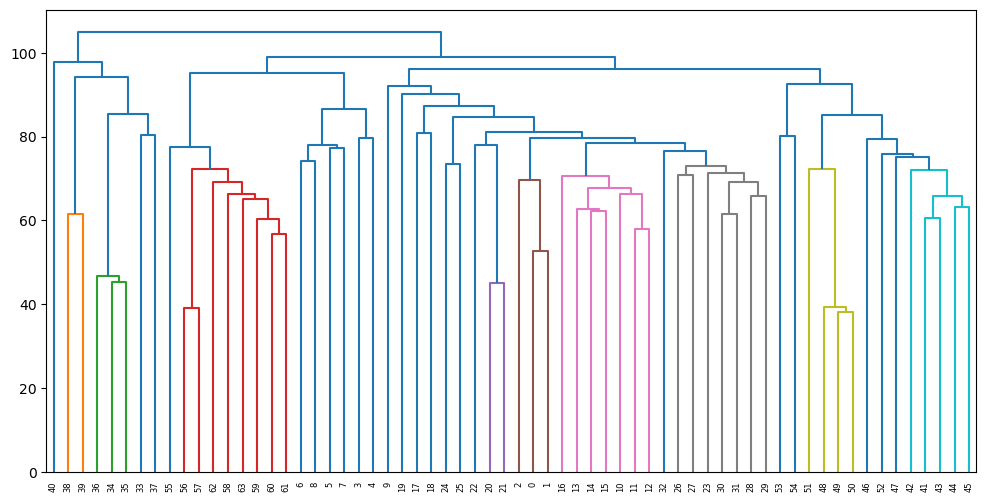

In [113]:
plt.figure(figsize=(12,6))
dendrogram(mergings, labels = pc_data.index)
plt.show()

In [114]:
# fitting data 
hc = AgglomerativeClustering(n_clusters =2, affinity ='euclidean', linkage='average')
y_hc = hc.fit_predict(x)

In [115]:
# finding silhouette score
sco_avg_new = silhouette_score(x, y_hc)


In [116]:
sco_avg_new


0.17382211135975

# CONCLUSION

### With the application of  PCA along with the reduction of the features to 25 we can see that the  score gets improved. So PCA is improving the model efficiency